In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dogs = pd.read_csv('./datasets/dogs.csv')

In [3]:
dogs.head()

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8


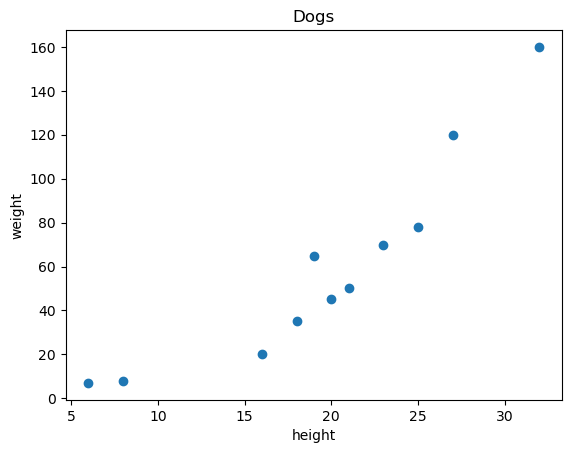

In [4]:
plt.scatter(dogs['height'], dogs['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.title('Dogs')
plt.show()

In [5]:
feature_names = dogs.columns[1:]
feature_names

Index(['height', 'weight'], dtype='object')

In [6]:
X = dogs[feature_names]
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)

In [10]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


In [11]:
from sklearn.cluster import KMeans

In [12]:
import numpy as np

In [13]:
kmeans = KMeans(n_clusters=2, n_init='auto')

In [14]:
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto')

In [15]:
# koja instanca pripada kom klasteru?
X[kmeans.labels_ == 0]

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
8,0.576923,0.281046
9,0.500000,0.379085
10,0.000000,0.000000


In [16]:
# centroide
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
centers

,height,weight
0,0.435897,0.228758
1,0.903846,0.869281


In [17]:
# SSE
kmeans.inertia_

0.7828436301619692

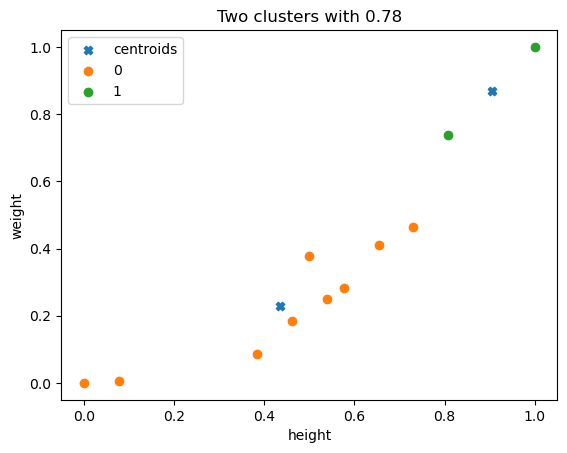

In [18]:
plt.scatter(centers['height'], centers['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)

plt.xlabel('height')
plt.ylabel('weight')
plt.title(f'Two clusters with {round(kmeans.inertia_, 2)}')
plt.legend()
plt.show()

In [19]:
dogs[kmeans.labels_ == 1]

,breed,height,weight
3,Bullmastiff,27,120
7,Great Dane,32,160


In [20]:
dogs[kmeans.labels_ == 0]

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65
10,Yorkshire Terrier,6,7


In [21]:
from sklearn.metrics import silhouette_samples

In [22]:
silhouette_values = silhouette_samples(X, kmeans.labels_)

In [23]:
silhouette_values

array([0.63311803, 0.6561122 , 0.66558095, 0.49228481, 0.58416901,
       0.0300102 , 0.32885172, 0.66221161, 0.59082202, 0.5334069 ,
       0.55473224])

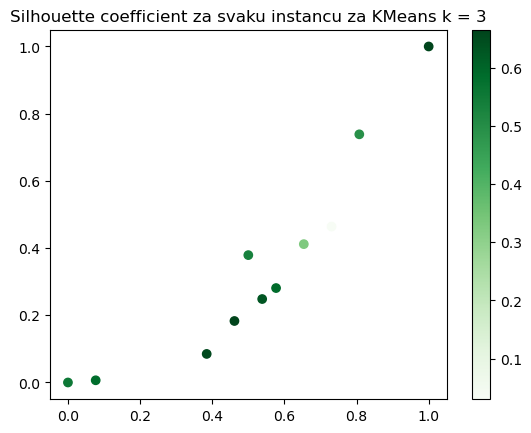

In [24]:
plt.scatter(X['height'], X['weight'], c=silhouette_values, cmap='Greens')
plt.colorbar()
plt.title('Silhouette coefficient za svaku instancu za KMeans k = 3')
plt.show()

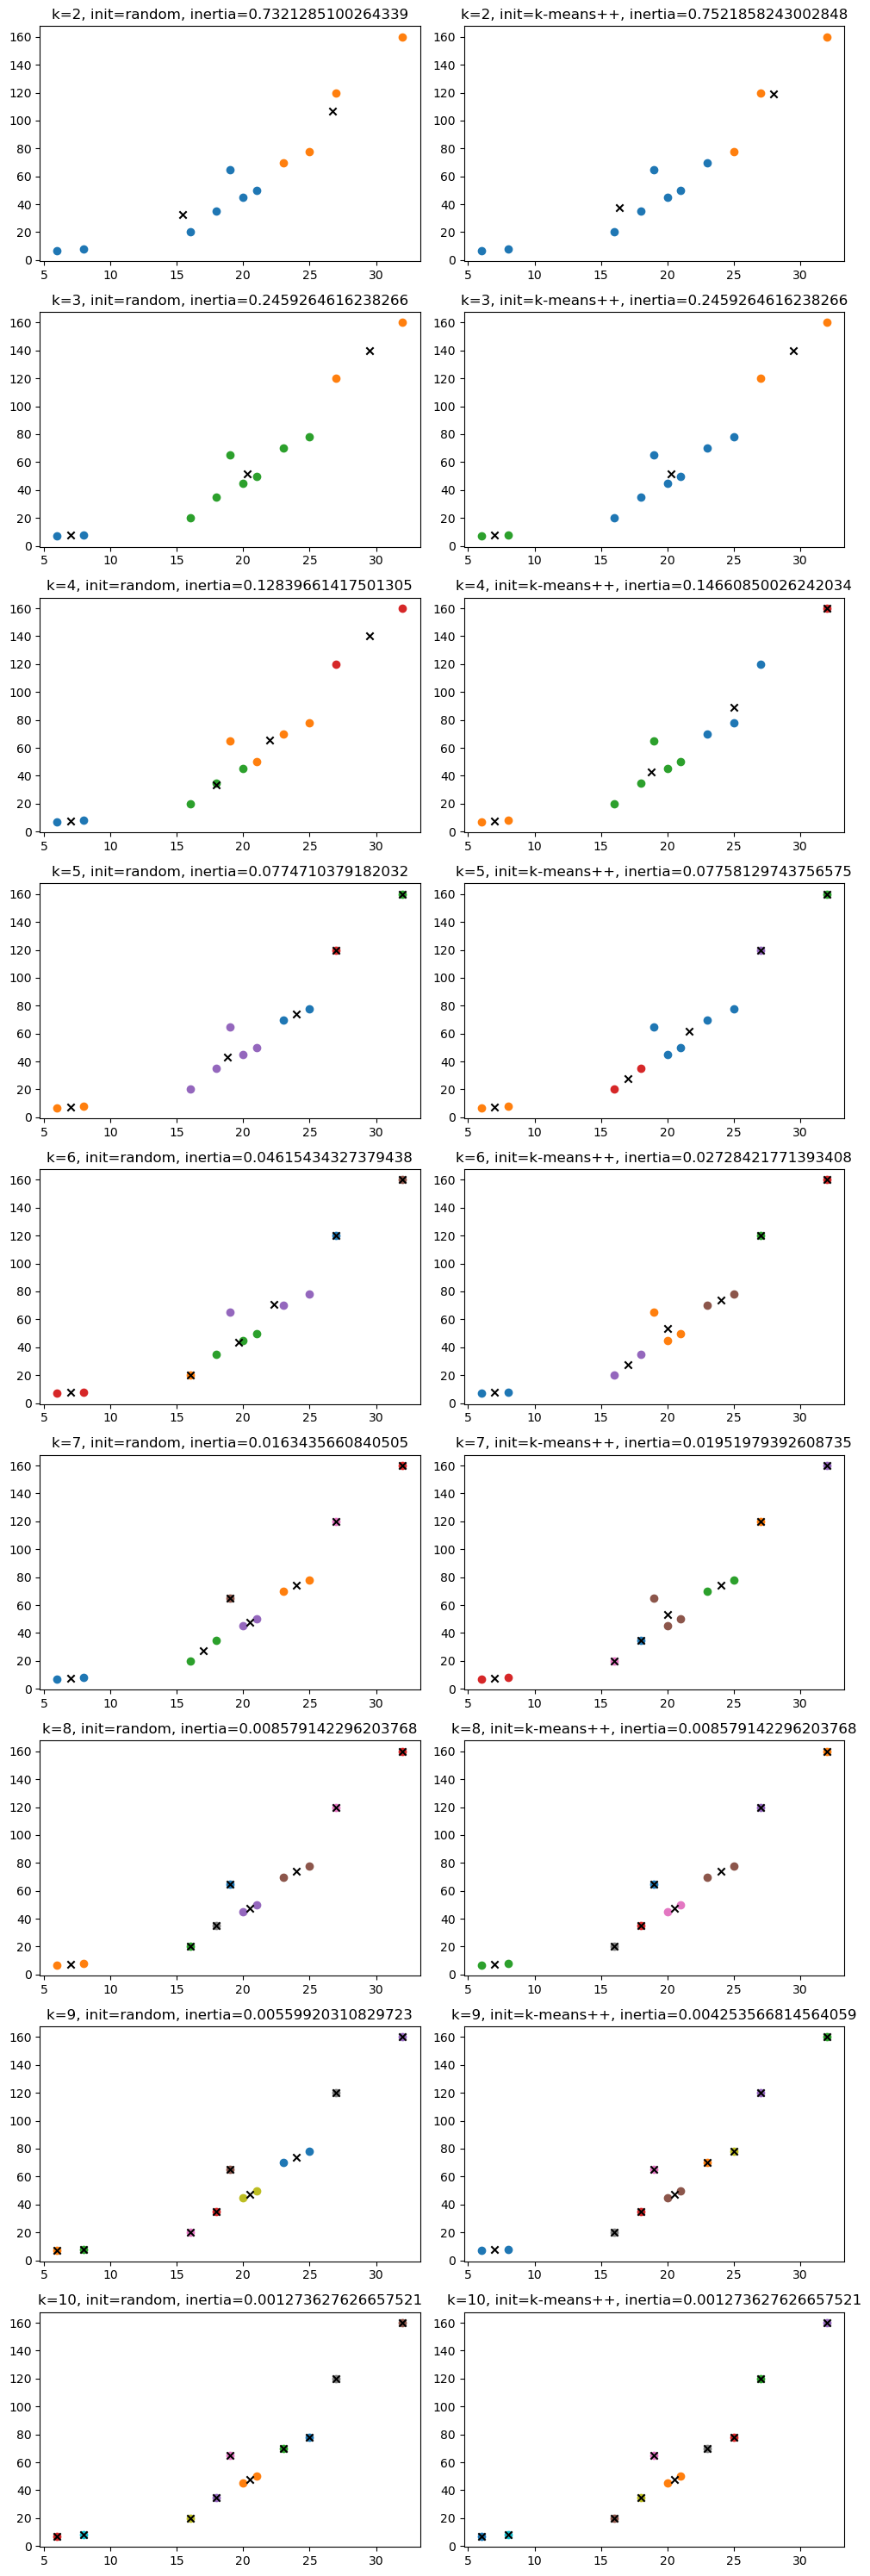

In [25]:
from sklearn.metrics import silhouette_score

ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1 
silhouette = []
inertias = [] 

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
        kmeans.fit(X)
        if init == 'k-means++':
            inertias.append(kmeans.inertia_)
            silhouette.append(silhouette_score(X, kmeans.labels_))

        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        for label in range(k):
            cluster = dogs[kmeans.labels_ == label]
            plt.scatter(cluster['height'], cluster['weight'])

        centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=feature_names)
        plt.scatter(centroids['height'], centroids['weight'], color='black', marker='x')
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')

plt.tight_layout()

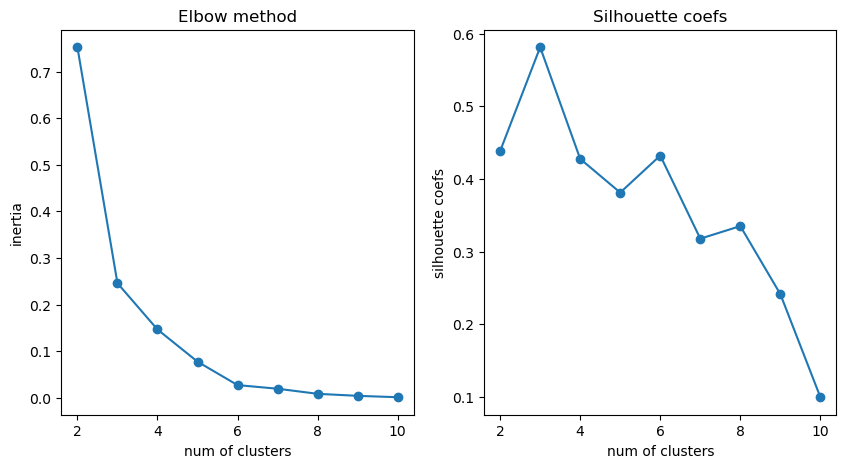

In [26]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('inertia')
plt.xlabel('num of clusters')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker='o')
plt.ylabel('silhouette coefs')
plt.xlabel('num of clusters')
plt.title('Silhouette coefs')

plt.show()

In [27]:
'''
import matplotlib.cm as cm

for n_clusters in [2, 3, 4, 5]:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    cluster = KMeans(n_clusters=n_clusters, n_init='auto', random_state=10)
    cluster_labels = cluster.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'For n_clusters={n_clusters}, The average silhouette score is: {silhouette_avg}')

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 0
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i 
        color = cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, 0, facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 
    ax1.set_title('The silhouette polt for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')
    ax1.axvline(x=silhouette_avg, color='red', linestyle='==')
    ax1.set_yticks([])
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(X['height'], X['weight'], marker='o', lw=0, alpha=0.7, c=colors, edgecolor='k')
    centers = cluster.cluster_centers_ 
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title('The visualization of the clustered data')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2st feature')
    plt.suptitle('Silhouette analysis for KMeans clustering on sample data with n_clusters = %d'%n_clusters, fontsize=14, fontweight='bold')

plt.show()
'''

'\nimport matplotlib.cm as cm\n\nfor n_clusters in [2, 3, 4, 5]:\n    fig, (ax1, ax2) = plt.subplots(1, 2)\n    fig.set_size_inches(18, 7)\n\n    ax1.set_xlim([-0.1, 1])\n    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])\n\n    cluster = KMeans(n_clusters=n_clusters, n_init=\'auto\', random_state=10)\n    cluster_labels = cluster.fit_predict(X)\n\n    silhouette_avg = silhouette_score(X, cluster_labels)\n    print(f\'For n_clusters={n_clusters}, The average silhouette score is: {silhouette_avg}\')\n\n    sample_silhouette_values = silhouette_samples(X, cluster_labels)\n\n    y_lower = 0\n    for i in range(n_clusters):\n        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]\n        ith_cluster_silhouette_values.sort()\n        size_cluster_i = ith_cluster_silhouette_values.shape[0]\n        y_upper = y_lower + size_cluster_i \n        color = cm.nipy_spectral(float(i)/n_clusters)\n        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_

For n_clusters = 2 The average silhouette_score is : 0.5210272444296898
For n_clusters = 3 The average silhouette_score is : 0.5813924452451538
For n_clusters = 4 The average silhouette_score is : 0.481494887542406
For n_clusters = 5 The average silhouette_score is : 0.38128807890396943


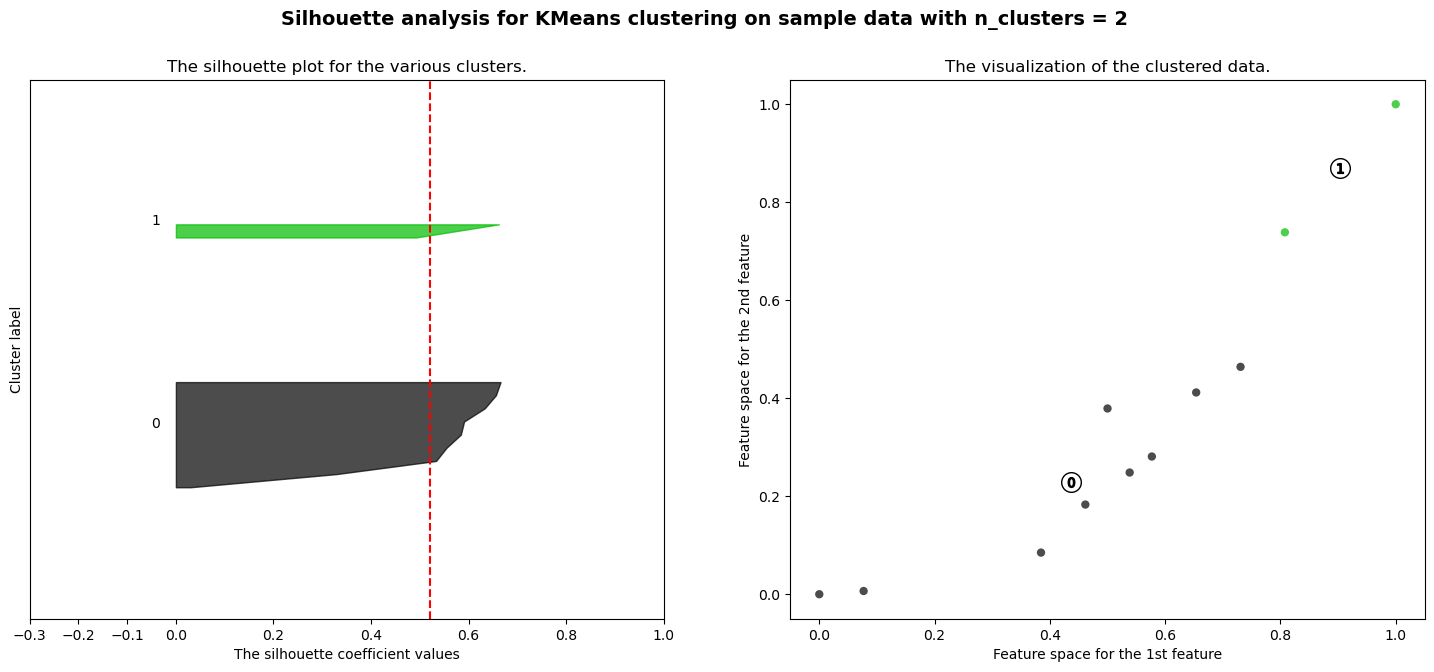

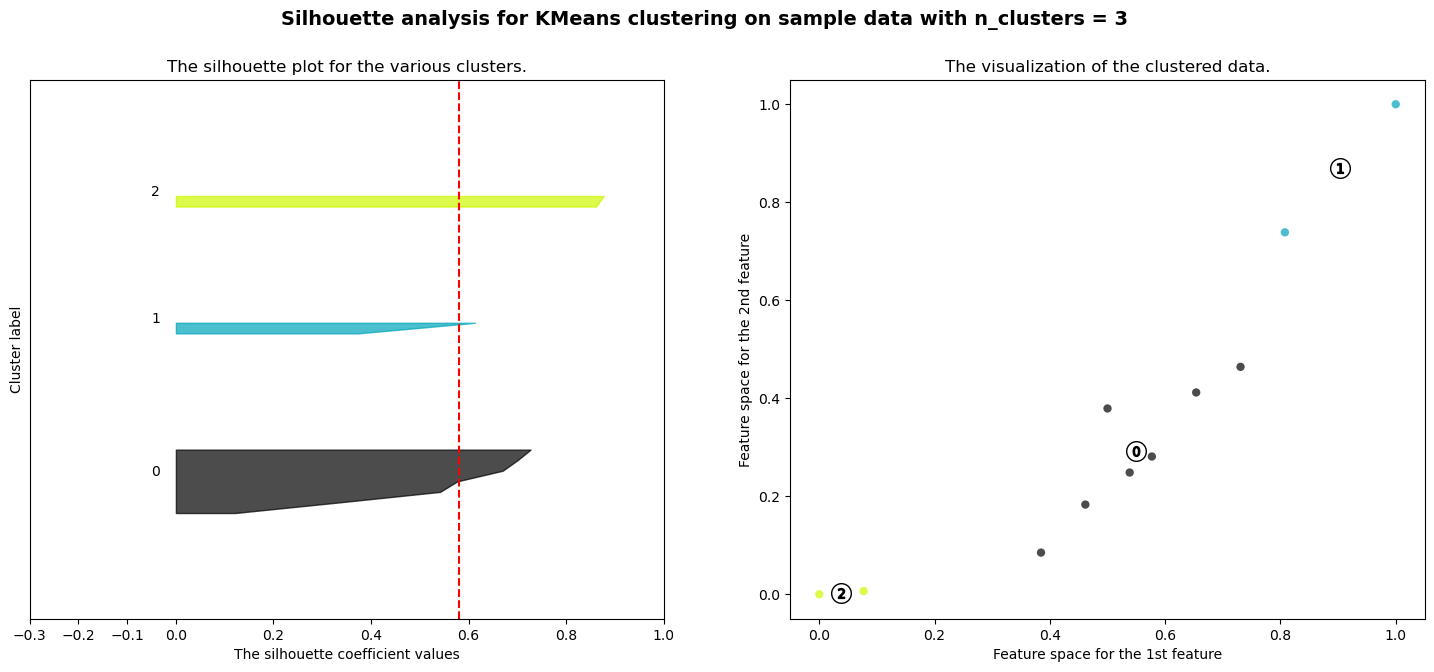

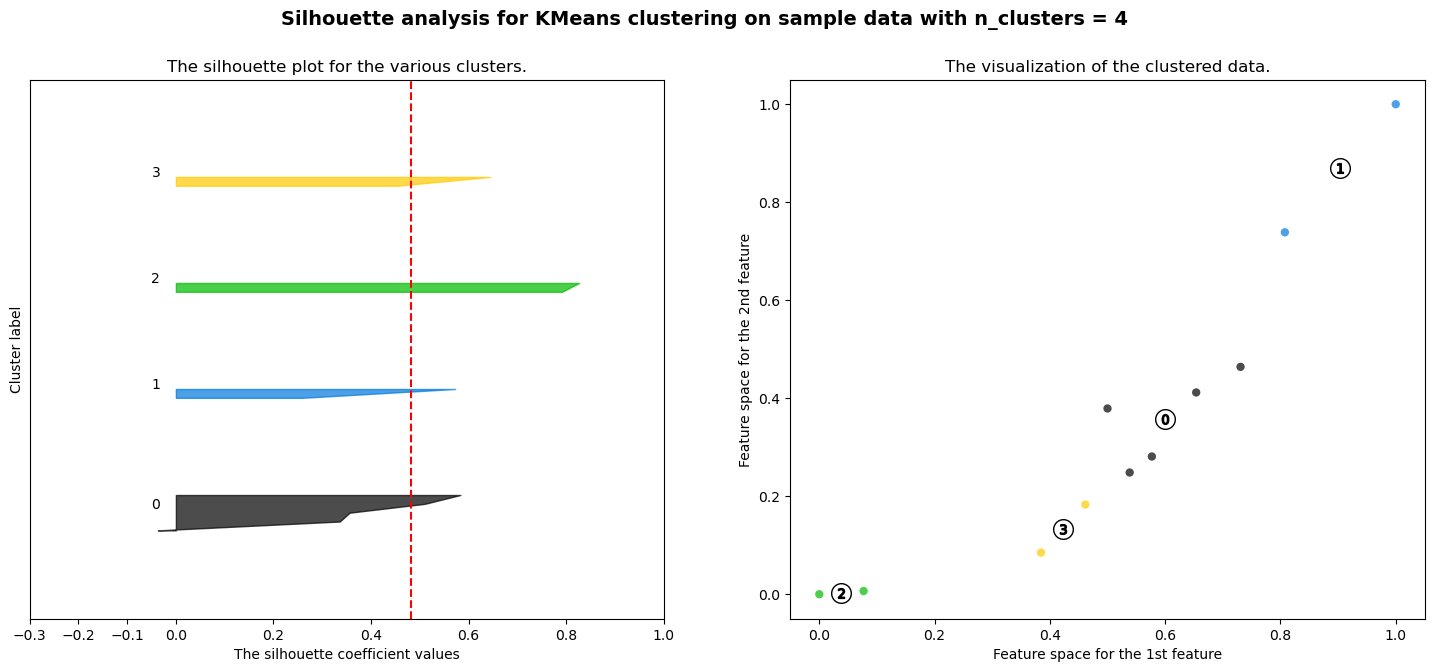

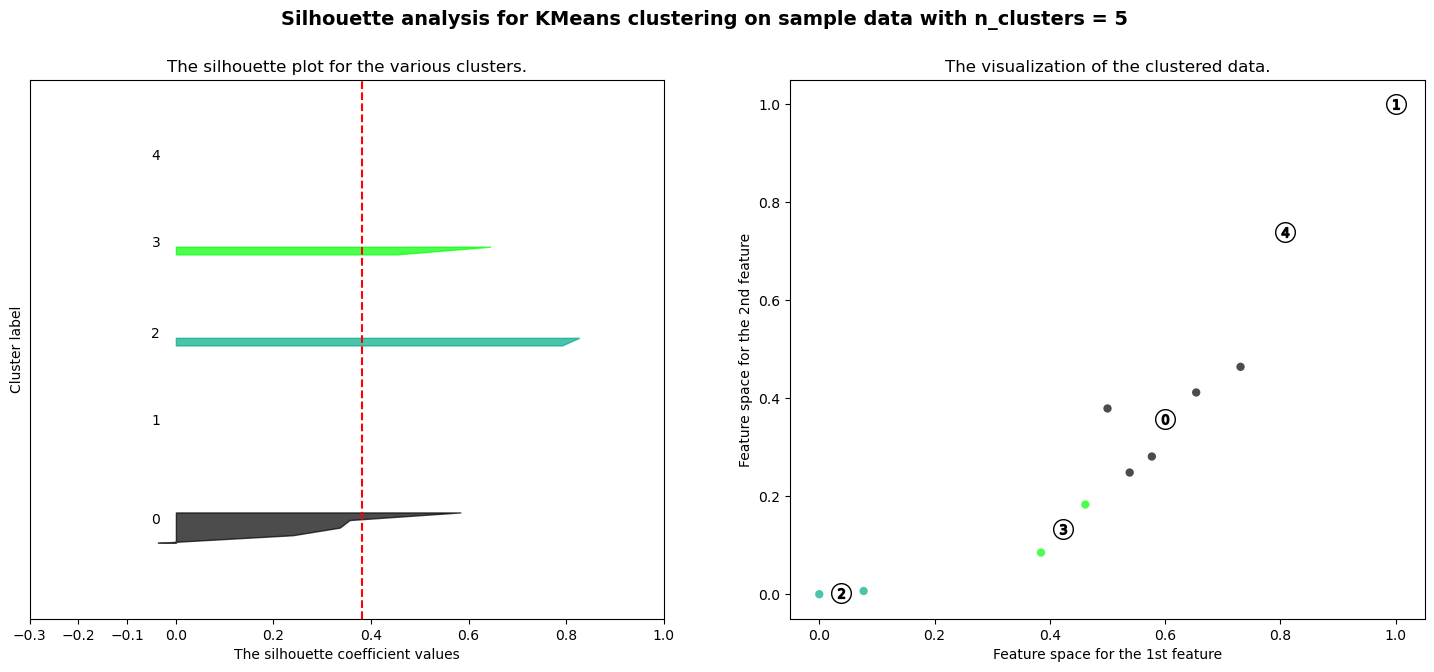

In [28]:
import matplotlib.cm as cm

for n_clusters in [2, 3, 4, 5]:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['height'], X['weight'], marker="o", lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


In [29]:
# Kompresija slike

In [30]:
from matplotlib.image import imread
import pandas as pd 
import seaborn as sns

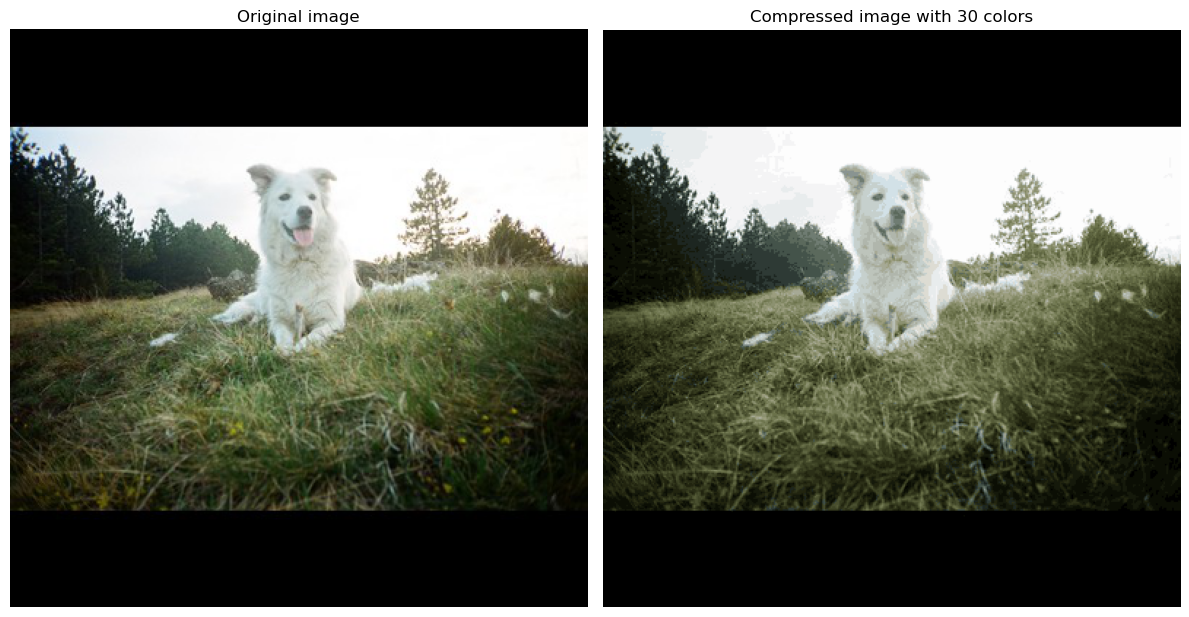

In [31]:
img = imread('./datasets/masa.jpg')
img_size = img.shape

X_img = img.reshape(img_size[0] * img_size[1], img_size[2])

km = KMeans(n_init='auto', n_clusters=30)
km.fit(X_img)

X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(img)
ax[0].set_title('Original image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

In [32]:
# Bisecting KMeans

In [33]:
from sklearn.cluster import BisectingKMeans

In [34]:
bkmeans = BisectingKMeans(n_clusters=3, bisecting_strategy='largest_cluster')
bkmeans

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

In [38]:
def visualize_clustering(data, centers, labels, feature_lnames, alg_name):
    plt.scatter(centers[:,0], centers[:,1], marker='X', label='centroids', color='black')

    for c in np.unique(labels):
        elems = data[labels == c]
        plt.scatter(elems[feature_names[0]], elems[feature_names[1]], label=c)

    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'{alg_name} {len(centers)}')
    plt.legend()

In [39]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

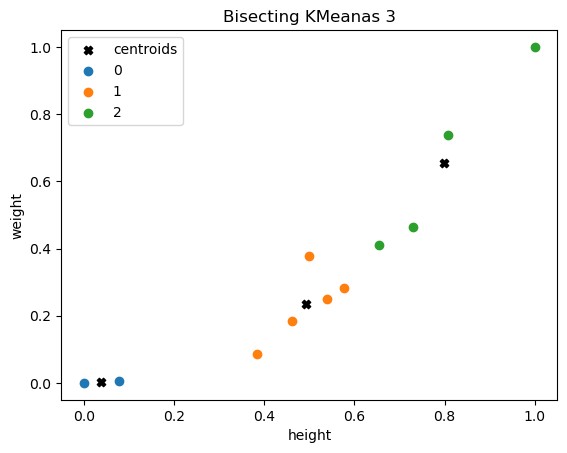

In [40]:
visualize_clustering(X, bkmeans.cluster_centers_, bkmeans.labels_, X.columns, 'Bisecting KMeanas')

In [42]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 2.2 MB/s eta 0:00:00m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=3f66846d733d8f35a0de36c0ee7f3ab4b6f7b7ac9324dc4336314ddf4d3828a7
  Stored in directory: /home/natasa/.cache/pip/wheels/b1/67/d1/6c29aeb1cd2d36447ad5b0de027580b8894aff702a9b50041e
Successfully built scikit-fuzzy


In [43]:
!pip install fuzzy-c-means

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 655.2 kB/s eta 0:00:000:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.9/423.9 kB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.1 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 318.7 kB/s eta 0:00:001m1.7 MB/s eta 0:00:01
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.12
    Uninstalling pydantic-1.10.12:
      Successfully uninstalled pydantic-1.10.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.4 requires pydantic<2.0, but you have pydantic 2.8.2 which is incompatible.


In [44]:
from fcmeans import FCM

In [45]:
fcm = FCM(n_clusters=3, m=3)

In [46]:
fcm.fit(X.to_numpy())

In [47]:
# hard clustering - dodeljivanje tacno jednom klasteru
labels = fcm.predict(X.to_numpy())

In [48]:
centers = fcm.centers

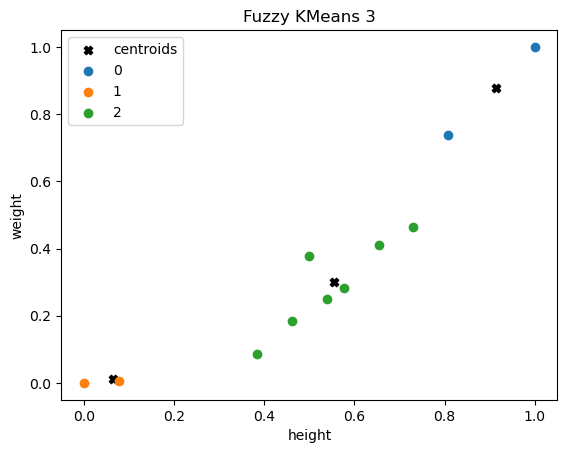

In [49]:
visualize_clustering(X, fcm.centers, fcm.predict(X.to_numpy()), X.columns, 'Fuzzy KMeans')
plt.show()

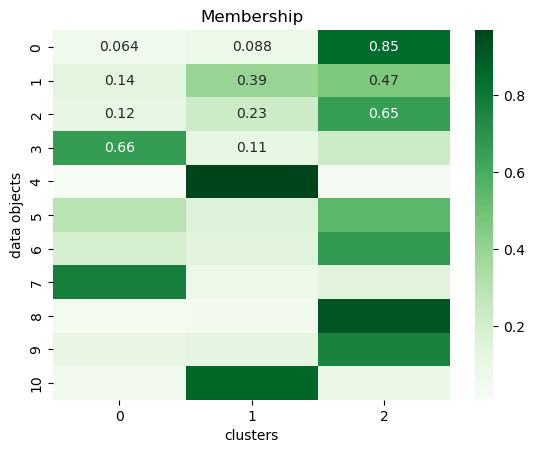

In [50]:
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=True)
plt.title('Membership')
plt.xlabel('clusters')
plt.ylabel('data objects')
plt.show()